# Poisson Approximation

<a href="#Poisson-approximation">Poisson approximation</a>

<a href="#Example---Number-of-couples-with-same-birthday">Example - Number of couples with same birthday</a>

# Poisson approximation 

$$Po(\lambda) \approx B(n,p)$$

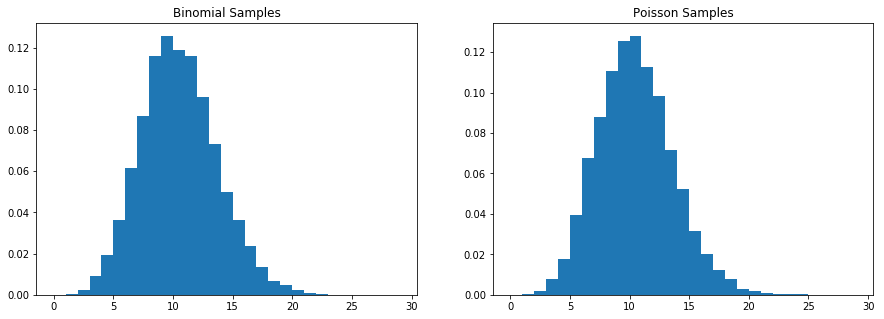

In [10]:
# Possion approximation Po(la) \approx B(n,p)

# import numpy as np for numerical computation 
import numpy as np

# import matplotlib.pyplot as plt for ploting
import matplotlib.pyplot as plt

# number of samples to generate
n_samples = 10000

# generate random samples of binomial distribution B(n,p)
n = 1000
p = 0.01
bin_samples = np.random.binomial(n, p, (n_samples,))

# generate random samples of Poisson distribution Po(la)
la = n*p
po_samples = np.random.poisson(la, (n_samples,))

# plot histogram of generated random samples of binomial distribution B(n,p)
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.hist(bin_samples, bins=np.arange(int(3*n*p)), density=True)
ax1.set_title("Binomial Samples")

ax2.hist(po_samples, bins=np.arange(int(3*n*p)), density=True)
ax2.set_title("Poisson Samples")

plt.show()

$$Po(\lambda) \approx \sum_{i=1}^n X_i\quad\mbox{where}\ X_i \sim B(p_i)$$

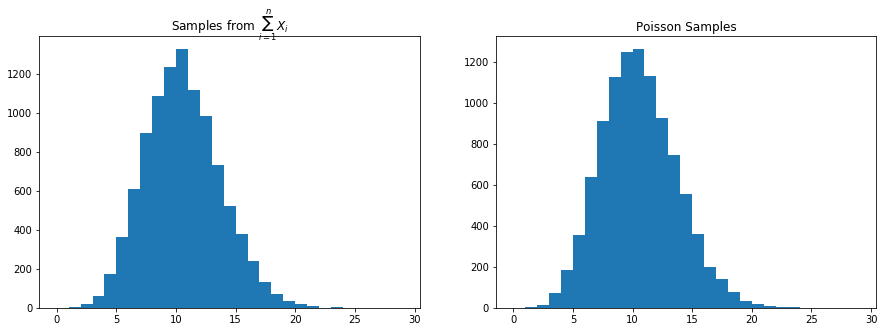

In [2]:
# Possion approximation Po(la) \approx \sum_{i=1}^n X_i where X_i \sim B(p_i)

# import numpy as np for numerical computation 
import numpy as np

# import matplotlib.pyplot as plt for ploting
import matplotlib.pyplot as plt

# number of samples to generate
n_samples = 10000

# generate random samples of \sum_{i=1}^n X_i where X_i \sim B(p_i)
n = 1000
p = np.random.uniform(0.,1., (n,1)) / 100 # p is not fixed, but small random
uniform_samples = np.random.uniform(0., 1., (n, n_samples))
bool_from_uniform_samples = (uniform_samples > 1-p)
bin_samples = np.sum(bool_from_uniform_samples, axis=0)

# generate random samples of Poisson distribution Po(la)
la = np.sum(p)
po_samples = np.random.poisson(lam=la, size=n_samples)

# plot histogram of generated random samples of binomial distribution B(n,p)
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.hist(bin_samples, np.arange(int(3*la)))
ax1.set_title("Samples from $\sum_{i=1}^n X_i$")

ax2.hist(po_samples, np.arange(int(3*la)))
ax2.set_title("Poisson Samples")

# show two histograms
plt.show()

[<a href="#Poisson-Approximation">Back to top</a>]

# Example - Number of couples with same birthday

Approximately 80,000 marriage took place in NY. 
Estimate the probability that
there are more than 250 couples with same birthday
who married in NY last year. 
$$S_n=\sum_{i=1}^n1_{A_{i}}\sim B(n,p)\approx Po(\lambda)$$

##### Exact probability using $S_n\sim B(n,p)$
$$P(S_n>250)=0.0187$$

##### Approximate probability using $X\sim Po(\lambda)$
$$P(X>250)=0.0188$$

##### Theoretical error bound
$$|P(S_n>250)-P(X>250)|
\le\sum_{i=1}^np_i^2=80000*\left(\frac{1}{365}\right)^2=0.6005$$

In [11]:
# number of couples with same birthday - one simulation

# import numpy as np for numerical computation 
import numpy as np

np.random.seed(337)

# number of couples
n_couples = 80000

# number of couples with same birthday
n_couples_with_same_birthday = 0
for i in range(n_couples):
    groom_birthday = int(np.random.choice(365))
    bride_birthday = int(np.random.choice(365))
    if groom_birthday == bride_birthday:
        n_couples_with_same_birthday += 1

# print number and expected number of couples with same birthday
print("Number of couples with same birthday          : ", n_couples_with_same_birthday) 
print("Expected number of couples with same birthday : ", (1/365)*n_couples)

Number of couples with same birthday          :  207
Expected number of couples with same birthday :  219.17808219178082


아래 코드는,
80000쌍의 커플중 같은 생일을 가지는 커플 수를 시뮬레이션을 통하여 1000개의 샘풀을 생성해서 히스토그램을 그립니다. 
그런데, 너무 느리군요.

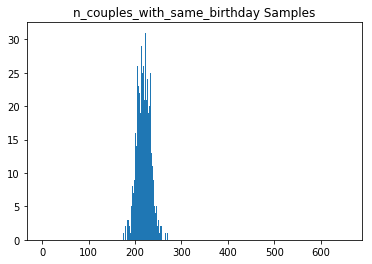

Time Used: 0:06:40


In [4]:
# number of couples with same birthday - many simulations with no vectorization

# import numpy as np for numerical computation 
import numpy as np

# import matplotlib.pyplot as plt for ploting
import matplotlib.pyplot as plt

# import time to measure computing time
import time

# import from datetime import timedelta to convert time
import datetime as dt

# start measuring computation time
tic = time.time()  

# number of random samples of number of couples with same birthday
n_sample = 1000

# generate random samples of number of couples with same birthday
samples_of_n_couples_with_same_birthday = []
for _ in range(n_sample):
    n_couples = 80000 # number of couples
    n_couples_with_same_birthday = 0 # initialization of n_couples_with_same_birthday
    for i in range(n_couples):
        groom_birthday = int(np.random.choice(365))
        bride_birthday = int(np.random.choice(365))
        if groom_birthday == bride_birthday:
            n_couples_with_same_birthday += 1 # update of n_couples_with_same_birthday           
    samples_of_n_couples_with_same_birthday.append(n_couples_with_same_birthday)

# plot histogram of generated random samples
mu = n_couples*(1/365) 
plt.hist(samples_of_n_couples_with_same_birthday, np.arange(int(3*mu)))
plt.title("n_couples_with_same_birthday Samples")
plt.show()

# end measuring computation time
toc = time.time() 

# print computation time
time_dif = toc - tic
print("Time Used: " + str(dt.timedelta(seconds=int(round(time_dif)))))

아래 코드는, 같은 작업을 두개의 for loop없이 실행합니다.
벡터리제이션이죠.
엄청 빠르군요.

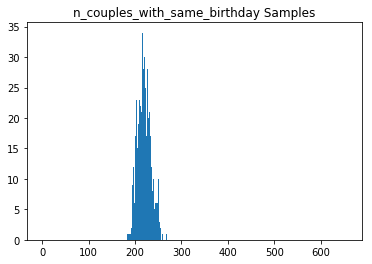

Time Used: 0:00:01


In [5]:
# number of couples with same birthday - many simulations with vectorization

# import numpy as np for numerical computation 
import numpy as np

# import matplotlib.pyplot as plt for ploting
import matplotlib.pyplot as plt

# import time to measure computing time
import time

# import from datetime import timedelta to convert time
import datetime as dt

# start measuring computation time
tic = time.time()

# number of random samples of number of couples with same birthday
n_samples = 1000

# generate random samples of number of couples with same birthday
n = 80000
p = 1/365
samples_of_n_couples_with_same_birthday = np.random.binomial(n, p, (n_samples,))

# plot histogram of generated random samples 
mu = n*p
plt.hist(samples_of_n_couples_with_same_birthday, np.arange(int(3*mu)))
plt.title("n_couples_with_same_birthday Samples")
plt.show()

# end measuring computation time
toc = time.time() 

# print computation time
time_dif = toc - tic
print("Time Used: " + str(dt.timedelta(seconds=int(round(time_dif)))))

Poisson approximation을 이용하여보았습니다.

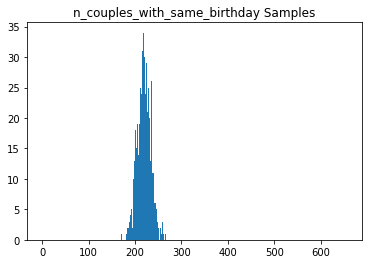

Time Used: 0:00:01


In [12]:
# number of couples with same birthday - Poisson approximation

# import numpy as np for numerical computation 
import numpy as np

# import matplotlib.pyplot as plt for ploting
import matplotlib.pyplot as plt

# import time to measure computing time
import time

# import from datetime import timedelta to convert time 
import datetime as dt

# start measuring computation time
tic = time.time()

# number of random samples of number of couples with same birthday
n_samples = 1000

# generate random samples of Poisson distribution Po(la)
n = 80000
p = 1/365
la = n*p
samples_of_n_couples_with_same_birthday = np.random.poisson(la, (n_samples,))

# plot histogram of generated random samples
mu = n*p
plt.hist(samples_of_n_couples_with_same_birthday, np.arange(int(3*mu)))
plt.title("n_couples_with_same_birthday Samples")
plt.show()

# end measuring computation time
toc = time.time() 

# print computation time
time_dif = toc - tic
print("Time Used: " + str(dt.timedelta(seconds=int(round(time_dif)))))

[<a href="#Poisson-Approximation">Back to top</a>]